#RF Section

## RF Default 10 years MAE -

In [ ]:
#Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Download the historical stock data for the past 10 years
data = yf.download('AAPL', start='2013-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705704,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494839,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035381,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941051,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983957,458707200


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631348,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818405,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865593,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.402328,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.719345,77034200


In [ ]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     62.383387    63.087693    61.696664    62.416599    60.072030   
std      48.683035    49.322128    48.051043    48.709794    48.789772   
min      13.856071    14.271429    13.753571    13.947500    11.952173   
25%      26.971250    27.219376    26.705000    26.983750    24.446697   
50%      41.353750    41.872499    40.888750    41.313749    39.143501   
75%      91.272499    92.881876    90.824377    91.526875    89.283182   
max     182.630005   182.940002   179.119995   182.009995   179.273621   

             Volume  
count  2.518000e+03  
mean   1.713540e+08  
std    1.250497e+08  
min    3.519590e+07  
25%    9.188698e+07  
50%    1.301368e+08  
75%    2.045116e+08  
max    1.460852e+09  


In [ ]:
data = data.drop('Adj Close', axis=1)

In [ ]:
print(data.describe())

              Open         High          Low        Close        Volume
count  2518.000000  2518.000000  2518.000000  2518.000000  2.518000e+03
mean     62.383387    63.087693    61.696664    62.416599  1.713540e+08
std      48.683035    49.322128    48.051043    48.709794  1.250497e+08
min      13.856071    14.271429    13.753571    13.947500  3.519590e+07
25%      26.971250    27.219376    26.705000    26.983750  9.188698e+07
50%      41.353750    41.872499    40.888750    41.313749  1.301368e+08
75%      91.272499    92.881876    90.824377    91.526875  2.045116e+08
max     182.630005   182.940002   179.119995   182.009995  1.460852e+09


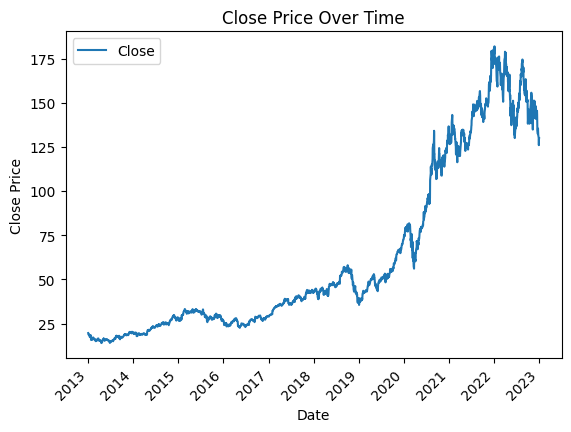

In [ ]:
# Plot the 'Close' price
data.plot(y='Close', use_index=True)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

In [ ]:
# Data preprocess

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close'] #Target feature

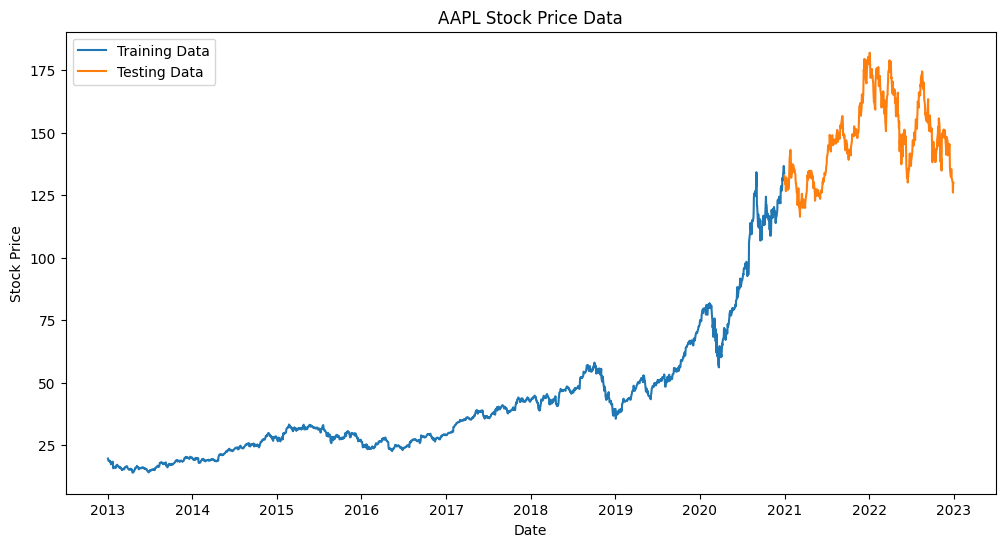

In [ ]:
# Split the data into training and testing sets 80/20
train_data = data.iloc[:int(len(data)*0.8)]
test_data = data.iloc[int(len(data)*0.8):]

# Visualise the training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Testing Data')
plt.title('AAPL Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Checking date range for training data
print("Training data date range:")
print(train_data.index.min(), "to", train_data.index.max())

# Checking date range for testing data
print("\nTesting data date range:")
print(test_data.index.min(), "to", test_data.index.max())

Training data date range:
2013-01-02 00:00:00 to 2020-12-30 00:00:00

Testing data date range:
2020-12-31 00:00:00 to 2022-12-30 00:00:00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = rf.predict(X_test)
print('The model score is:' , rf.score(X, y))

The model score is: 0.9999072266525345


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, predictions)

In [ ]:
print("Mean Squared Error (MSE): {:.2f}".format(MSE))
print("Root Mean Squared Error (RMSE): {:.2f}".format(RMSE))
print("Mean Absolute Error (MAE): {:.2f}".format(MAE))
print("R² Score:", r2)

Mean Squared Error (MSE): 0.77
Root Mean Squared Error (RMSE): 0.88
Mean Absolute Error (MAE): 0.49
R² Score: 0.9996646898836556


## RF Default 5 years MAE -

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Download the historical stock data for the past 5 years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568935,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561871,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750275,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214226,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061157,82271200


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631363,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818420,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865593,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.402328,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.719345,77034200


In [ ]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     98.028503    99.217804    96.881497    98.092897    95.913522   
std      46.302471    46.894754    45.688159    46.309891    46.240692   
min      35.994999    36.430000    35.500000    35.547501    33.989902   
25%      50.956249    51.448750    50.573750    51.022501    49.046968   
50%      91.279999    92.970001    90.910004    91.632500    89.386230   
75%     142.760002   144.474998   141.004997   142.864998   140.842407   
max     182.630005   182.940002   179.119995   182.009995   179.273605   

             Volume  
count  1.259000e+03  
mean   1.168806e+08  
std    5.504461e+07  
min    3.519590e+07  
25%    8.014245e+07  
50%    1.023002e+08  
75%    1.372052e+08  
max    4.265100e+08  


In [ ]:
data = data.drop('Adj Close', axis=1)

In [ ]:
print(data.describe())

              Open         High          Low        Close        Volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean     98.028503    99.217804    96.881497    98.092897  1.168806e+08
std      46.302471    46.894754    45.688159    46.309891  5.504461e+07
min      35.994999    36.430000    35.500000    35.547501  3.519590e+07
25%      50.956249    51.448750    50.573750    51.022501  8.014245e+07
50%      91.279999    92.970001    90.910004    91.632500  1.023002e+08
75%     142.760002   144.474998   141.004997   142.864998  1.372052e+08
max     182.630005   182.940002   179.119995   182.009995  4.265100e+08


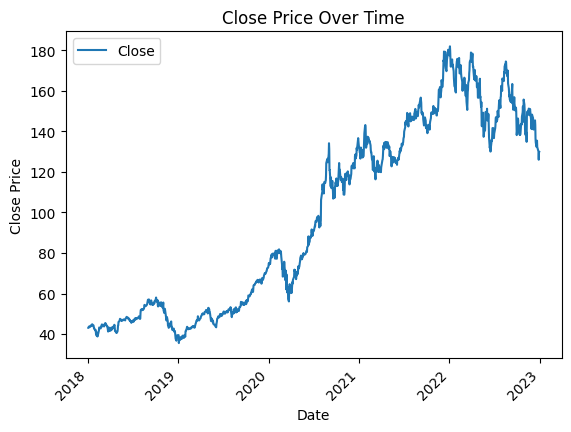

In [ ]:
# Plot the 'Close' price
data.plot(y='Close', use_index=True)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

In [ ]:
# Data preprocess

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close'] #Target feature

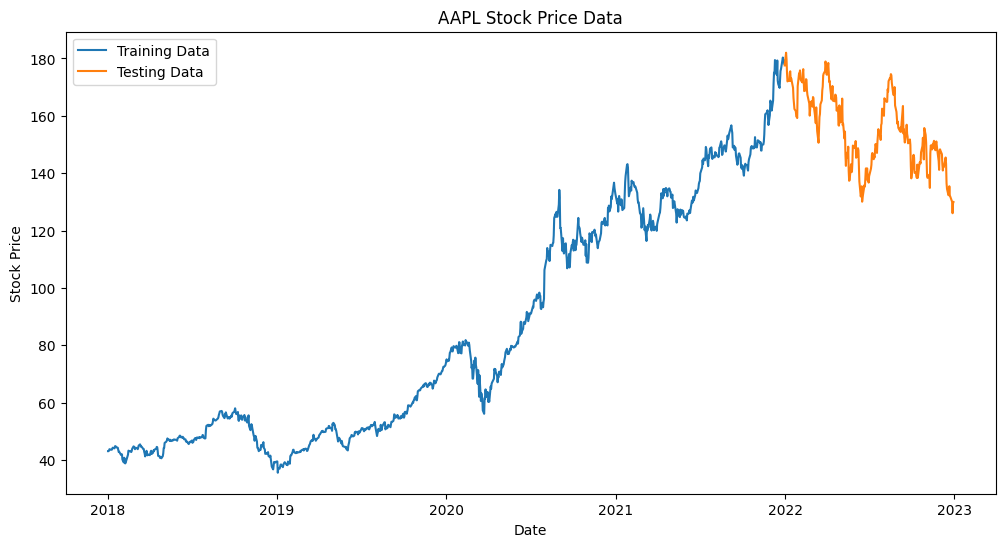

In [ ]:
# Split the data into training and testing sets
train_data = data.iloc[:int(len(data)*0.8)]
test_data = data.iloc[int(len(data)*0.8):]

# Create a graph to visualise the training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Testing Data')
plt.title('AAPL Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Checking date range for training data
print("Training data date range:")
print(train_data.index.min(), "to", train_data.index.max())

# Checking date range for testing data
print("\nTesting data date range:")
print(test_data.index.min(), "to", test_data.index.max())

Training data date range:
2018-01-02 00:00:00 to 2021-12-30 00:00:00

Testing data date range:
2021-12-31 00:00:00 to 2022-12-30 00:00:00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = rf.predict(X_test)
print('The model score is:' , rf.score(X, y))

The model score is: 0.9998217166115543


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R² score
r2 = r2_score(y_test, predictions)
# Calculate evaluation metrics
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

In [ ]:
print("Mean Absolute Error (MAE): {:.2f}".format(MAE))
print("Mean Squared Error (MSE): {:.2f}".format(MSE))
print("Root Mean Squared Error (RMSE): {:.2f}".format(RMSE))
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.74
Mean Squared Error (MSE): 1.24
Root Mean Squared Error (RMSE): 1.11
R² Score: 1.00


## RF Feature Engineering  MAE -

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer
from sklearn.preprocessing import FunctionTransformer

# Download data
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01') # 7 years

# Feature engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged features
for i in range(1, 6):  # Create 5 lagged features
    data[f'Lagged_Close_{i}'] = data['Close'].shift(i)

data = data.dropna()

In [ ]:
# Prepare data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Lagged_Close_1', 'Lagged_Close_2', 'Lagged_Close_3', 'Lagged_Close_4', 'Lagged_Close_5']]
y = data['Close']

# Split data into training/validation/testing sets (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

In [ ]:
# Predictions and evaluations
for dataset_name, X_data, y_data in [('Validation', X_val, y_val), ('Test', X_test, y_test)]:
    y_pred = model.predict(X_data)

    mae = mean_absolute_error(y_data, y_pred)
    mse = mean_squared_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    r2 = r2_score(y_data, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print("-" * 40)
    print(f"{'Mean Absolute Error (MAE)':<35}: {mae:.4f}")
    print(f"{'Mean Squared Error (MSE)':<35}: {mse:.4f}")
    print(f"{'Root Mean Squared Error (RMSE)':<35}: {rmse:.4f}")
    print(f"{'R-squared (R2)':<35}: {r2:.4f}")

[*********************100%***********************]  1 of 1 completed



Validation Set Metrics:
----------------------------------------
Mean Absolute Error (MAE)          : 0.6524
Mean Squared Error (MSE)           : 0.9582
Root Mean Squared Error (RMSE)     : 0.9789
R-squared (R2)                     : 0.9996

Test Set Metrics:
----------------------------------------
Mean Absolute Error (MAE)          : 0.6396
Mean Squared Error (MSE)           : 1.0223
Root Mean Squared Error (RMSE)     : 1.0111
R-squared (R2)                     : 0.9996


## RF Hypertuning - MAE -

K-fold cross vaildation/ Regularization / Ensemble method - bagging

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Download historical stock data for Apple (AAPL) for 2018-2023
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
}

# Initialize K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create a Random Forest Regressor model
    rf = RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=4)

    # Grid Search Cross-Validation for best hyperparameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    grid_search.fit(X_tr, y_tr)

    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"Mean Squared Error (MSE) for this fold: {mse:.2f}")

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("R² Score:", r2)

[*********************100%***********************]  1 of 1 completed

Fitting 3 folds for each of 81 candidates, totalling 243 fits


Mean Squared Error (MSE) for this fold: 1.30
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 0.96
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 0.85
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 1.48
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 1.78
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Mean Absolute Error (MAE): 0.74
Mean Squared Error (MSE): 1.24
Root Mean Squared Error (RMSE): 1.12
R² Score: 0.9994092604338579


## RF Combine 1 - MAE

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Download historical stock data for Apple (AAPL) for the past 5 years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()  # 30-day rolling standard deviation

# Momentum Indicators - Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Lag Features - Using lagged closing prices
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)  # Creating lagged features for 1 to 5 days

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].dropna()
y = data['Close']  # The target variable

[*********************100%***********************]  1 of 1 completed


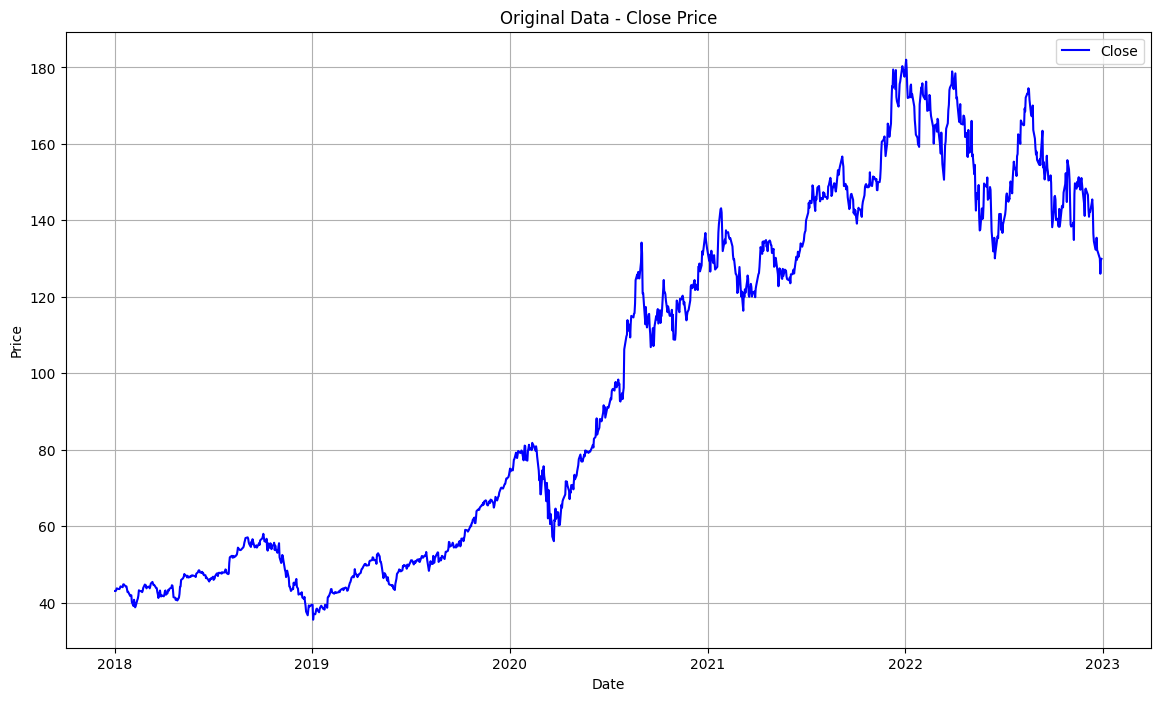

In [ ]:
# Create a line chart with the original 'Close' data
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Close', color='b')
plt.title('Original Data - Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

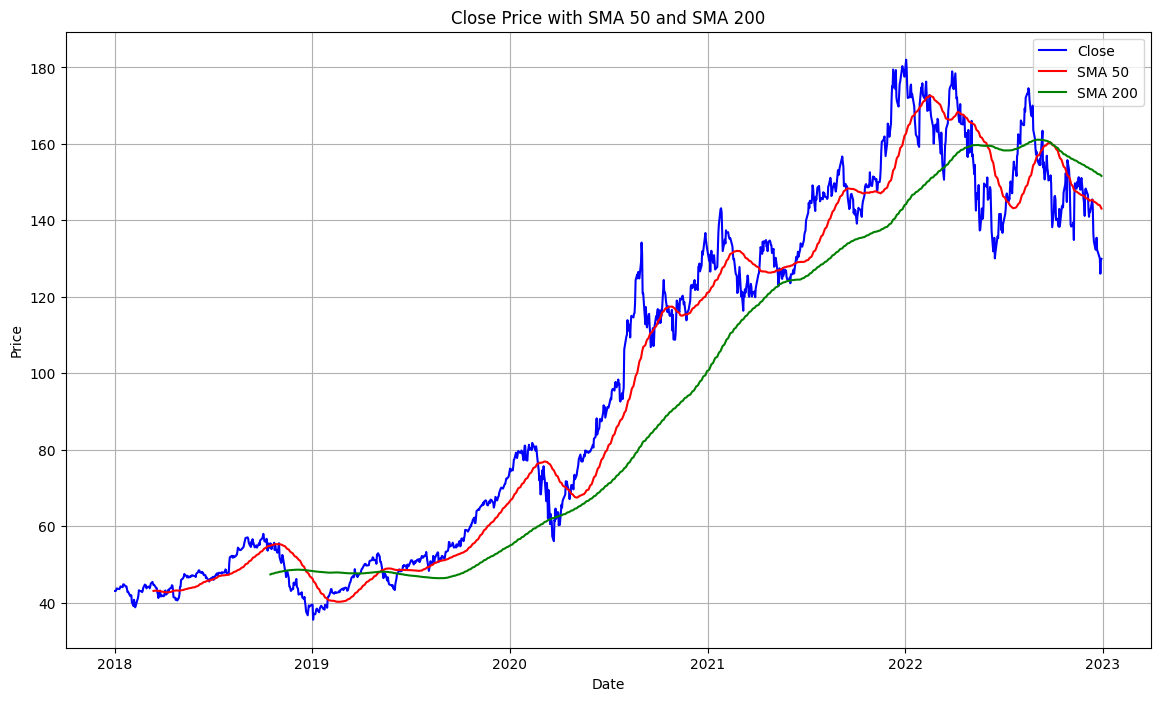

In [ ]:
# Create a line chart with SMA 50 and SMA 200 overlaid
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Close', color='b')
plt.plot(data['SMA_20'], label='SMA 20', color='r')
plt.plot(data['SMA_200'], label='SMA 200', color='g')
plt.title('Close Price with SMA 20 and SMA 200')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

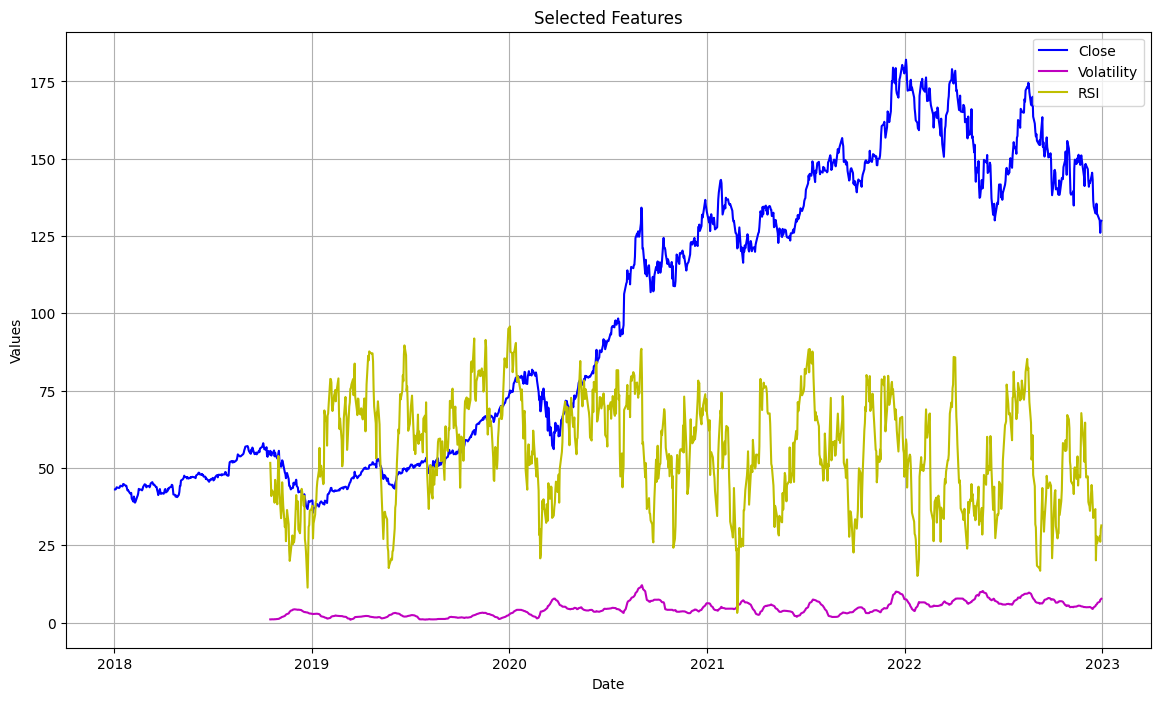

In [ ]:
# Create a line chart for the selected features
plt.figure(figsize=(14, 8))

plt.plot(data['Close'], label='Close', color='b')
plt.plot(X.index, X['Volatility_30d'], label='Volatility', color='m')
plt.plot(X.index, X['RSI'], label='RSI', color='y')

plt.title('Selected Features')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Drop missing values from both X and y
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'Close']].dropna()

# Split the data into features (X) and target variable (y)
X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data_cleaned['Close']

In [ ]:
# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)

# Pipeline to handle missing values / TRAIN MODEL
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestRegressor(random_state=42))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

# Initialise GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2,
                           error_score='raise')


start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

end_time = time.time()

# Calculate time taken to run search
fit_duration = end_time - start_time
print(f"Time taken for GridSearchCV fitting: {fit_duration:.2f} seconds")

# Best model picked
best_pipeline = grid_search.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Time taken for GridSearchCV fitting: 396.05 seconds


In [ ]:
# Make predictions on the validation set
y_val_pred = best_pipeline.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_pipeline.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Print the best parameters found during tuning
print(f"\nBest parameters from GridSearchCV: {grid_search.best_params_}")

Validation Mean Absolute Error (MAE): 9.99
Validation Mean Squared Error (MSE): 164.56
Validation Root Mean Squared Error (RMSE): 12.83
Validation R-squared (R2): -0.30

Test Mean Absolute Error (MAE): 3.09
Test Mean Squared Error (MSE): 27.55
Test Root Mean Squared Error (RMSE): 5.25
Test R-squared (R2): 0.75

Best parameters from GridSearchCV: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 100}


## RF Combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Download historical stock data for Apple (AAPL) from 2016 to 2023 / 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Momentum Indicators - Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Lag Features for 1 to 5 days
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)

# Drop rows with NA
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200',
                      'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3',
                      'lag_4', 'lag_5', 'Close']].dropna()

X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200',
                   'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3',
                   'lag_4', 'lag_5']]
y = data_cleaned['Close'] # Target varible

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Random Forest model
rf = RandomForestRegressor(random_state=42)

# pipeline to handle missing values
pipeline = make_pipeline(SimpleImputer(strategy='mean'), rf)

# GridSearchCV Hyperparameter tuning
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_features': [None, 'sqrt', 'log2'],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

# Model achieved best combination
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}



Validation Mean Absolute Error (MAE): 10.02
Validation Mean Squared Error (MSE): 164.31
Validation Root Mean Squared Error (RMSE): 12.82
Validation R-squared (R2): -0.40

Test Mean Absolute Error (MAE): 2.99
Test Mean Squared Error (MSE): 26.94
Test Root Mean Squared Error (RMSE): 5.19
Test R-squared (R2): 0.76


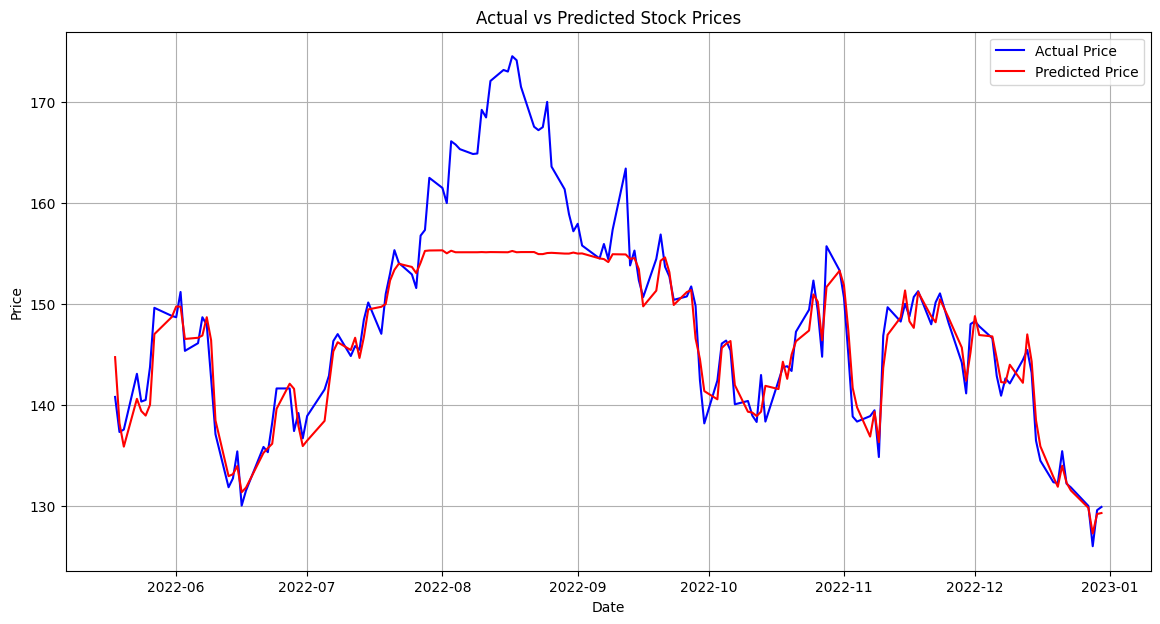

In [ ]:
# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Visualise the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_test_pred, label='Predicted Price', color='r')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## RF Combine 3 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Start timer for data download allowing to see the progess of the entire model
start_time = time.time()

# Download historical stock data for Apple (AAPL) from 2016 to 2023
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering for how long it takes to run
start_time = time.time()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Function to compute the Relative Strength Index
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
data['RSI'] = compute_rsi(data)

# Function to compute the Moving Average Convergence Divergence
def compute_macd(data, short_window=12, long_window=26):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    return exp1 - exp2

# Calculate MACD
data['MACD'] = compute_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Low'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

# Creating lag features
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)

# Clean the data
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200', 'Volatility_30d', 'RSI', 'MACD',
                      'Bollinger_High', 'Bollinger_Low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'Close']].dropna()

# Prepare the feature set and target variable
X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200',
                   'Volatility_30d', 'RSI', 'MACD',
                   'Bollinger_High', 'Bollinger_Low',
                   'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data_cleaned['Close']

In [ ]:
# Start timer for data splitting
start_time = time.time()
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Create the pipeline
pipeline = make_pipeline(SimpleImputer(strategy='mean'), rf)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200, 300],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__max_depth': [None, 10, 20, 30, 40],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

# Start timer for GridSearchCV fitting
start_time = time.time()
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)

# Best model is selected from grid search
best_model = grid_search.best_estimator_

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.14 seconds
Time taken for feature engineering: 0.05 seconds
Time taken for data splitting: 0.02 seconds
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


Time taken for GridSearchCV fitting: 2487.42 seconds
Best parameters found: {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}

Validation Mean Absolute Error (MAE): 10.21
Validation Mean Squared Error (MSE): 169.59
Validation Root Mean Squared Error (RMSE): 13.02
Validation R-squared (R2): -0.44

Test Mean Absolute Error (MAE): 3.03
Test Mean Squared Error (MSE): 27.57
Test Root Mean Squared Error (RMSE): 5.25
Test R-squared (R2): 0.75


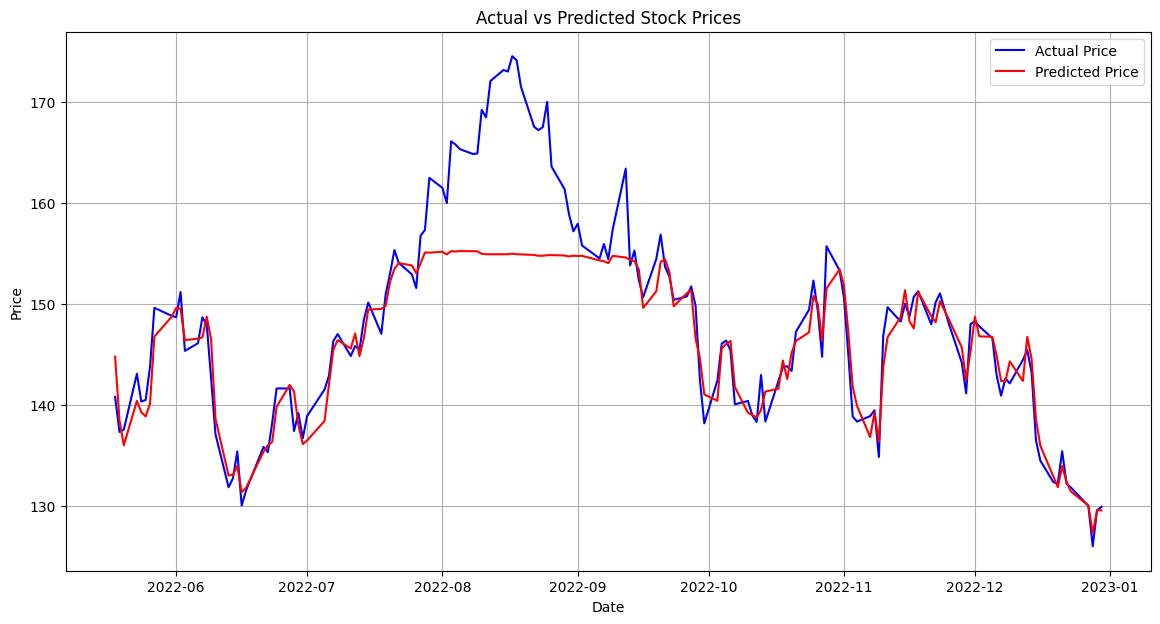

In [ ]:
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")
print(f"Time taken for GridSearchCV fitting: {time.time() - start_time:.2f} seconds")
print(f"Best parameters found: {grid_search.best_params_}")

# Make predictions based on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Visualise the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_test_pred, label='Predicted Price', color='r')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# SVR Section

## SVR Default 10 year - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download the historical stock data for the past 10 years
data = yf.download('AAPL', start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# split into 80/20 train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 1.46
Mean Squared Error (MSE): 11.35
Root Mean Squared Error (RMSE): 3.37
R^2 Score: 0.9950728507733743


## SVR Default 5 year - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download the historical stock data for the past 5 years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Prepare the feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error (MSE): 20.380234577538108
Mean Absolute Error (MAE): 2.4686361630124876
Root Mean Squared Error (RMSE): 4.514447316952332
R^2 Score: 0.9903219242253066


## SVR Feature Engineering - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical stock data for Apple (AAPL) for the past 5 years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Feature Engineering: Moving Averages (SMA) and Relative Strength Index (RSI)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred = svr.predict(X_train)
y_val_pred = svr.predict(X_val)
y_test_pred = svr.predict(X_test)

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_overall = mean_squared_error(y, svr.predict(X_scaled))
mae_overall = mean_absolute_error(y, svr.predict(X_scaled))
r2_overall = r2_score(y, svr.predict(X_scaled))

# Calculate RMSE for each set
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)
rmse_overall = np.sqrt(mse_overall)

# Display results with RMSE
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R^2 Score: {r2_train:.2f}")

print("\nValidation Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R^2 Score: {r2_val:.2f}")

print("\nTesting Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R^2 Score: {r2_test:.2f}")

print("\nOverall Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_overall:.2f}")
print(f"Mean Squared Error (MSE): {mse_overall:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_overall:.2f}")
print(f"R^2 Score: {r2_overall:.2f}")

Training Set Evaluation:
Mean Absolute Error (MAE): 3.77
Mean Squared Error (MSE): 30.12
Root Mean Squared Error (RMSE): 5.49
R^2 Score: 0.98

Validation Set Evaluation:
Mean Absolute Error (MAE): 3.79
Mean Squared Error (MSE): 28.17
Root Mean Squared Error (RMSE): 5.31
R^2 Score: 0.98

Testing Set Evaluation:
Mean Absolute Error (MAE): 3.45
Mean Squared Error (MSE): 22.77
Root Mean Squared Error (RMSE): 4.77
R^2 Score: 0.99

Overall Set Evaluation:
Mean Absolute Error (MAE): 3.73
Mean Squared Error (MSE): 28.72
Root Mean Squared Error (RMSE): 5.36
R^2 Score: 0.99


## SVR Hyperuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 2: Download the historical stock data for the past 5 years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Prepare the feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']].iloc[:-1]  # All rows except the last one
y = data['Close'].iloc[:-1]  # All rows except the last one

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-validation-test split (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), random_state=42)

# Perform hyperparameter optimization using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
svr_best = grid_search.best_estimator_

# Evaluate the model on the training set
predictions_train = svr_best.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

# Evaluate the model on the validation set
predictions_val = svr_best.predict(X_val)
mae_val = mean_absolute_error(y_val, predictions_val)
mse_val = mean_squared_error(y_val, predictions_val)
r2_val = r2_score(y_val, predictions_val)

# Evaluate the model on the test set
predictions_test = svr_best.predict(X_test)
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

# Evaluate the model on the overall dataset
predictions_all = svr_best.predict(X_scaled)
mae_all = mean_absolute_error(y, predictions_all)
mse_all = mean_squared_error(y, predictions_all)
r2_all = r2_score(y, predictions_all)

# Print evaluations
print("Training Set Evaluation:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, R2: {r2_train:.2f}")

print("Validation Set Evaluation:")
print(f"MAE: {mae_val:.2f}, MSE: {mse_val:.2f}, R2: {r2_val:.2f}")

print("Testing Set Evaluation:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, R2: {r2_test:.2f}")

print("Overall Set Evaluation:")
print(f"MAE: {mae_all:.2f}, MSE: {mse_all:.2f}, R2: {r2_all:.2f}")

# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel='rbf', C=svr_best.C, gamma=svr_best.gamma)
svr_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_train_pred_tuned = svr_tuned.predict(X_train)
y_val_pred_tuned = svr_tuned.predict(X_val)
y_test_pred_tuned = svr_tuned.predict(X_test)

# Evaluate the model with tuned hyperparameters
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

evaluate_model(y_train, y_train_pred_tuned, "Tuned Training")
evaluate_model(y_val, y_val_pred_tuned, "Tuned Validation")
evaluate_model(y_test, y_test_pred_tuned, "Tuned Testing")

# Evaluate the tuned model on the entire dataset (for overall performance)
y_pred_all_tuned = svr_tuned.predict(X_scaled)
evaluate_model(y, y_pred_all_tuned, "Tuned Overall")

[*********************100%%**********************]  1 of 1 completed


Training Set Evaluation:
MAE: 0.57, MSE: 0.72, R2: 1.00
Validation Set Evaluation:
MAE: 0.58, MSE: 0.74, R2: 1.00
Testing Set Evaluation:
MAE: 0.62, MSE: 0.81, R2: 1.00
Overall Set Evaluation:
MAE: 0.58, MSE: 0.74, R2: 1.00

Tuned Training Set Evaluation:
Mean Absolute Error (MAE): 0.57
Mean Squared Error (MSE): 0.72
Root Mean Squared Error (RMSE): 0.85
R-squared (R2): 1.00

Tuned Validation Set Evaluation:
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.74
Root Mean Squared Error (RMSE): 0.86
R-squared (R2): 1.00

Tuned Testing Set Evaluation:
Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 0.81
Root Mean Squared Error (RMSE): 0.90
R-squared (R2): 1.00

Tuned Overall Set Evaluation:
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.74
Root Mean Squared Error (RMSE): 0.86
R-squared (R2): 1.00



Comparison for the last 10 days using SVR:
        Date      Actual  Prediction  Difference
0 2022-12-16  134.509995  135.216955   -0.706961
1 2022-12-19  132.369995  132.194538    0.175457
2 2022-12-20  132.300003  131.651184    0.648819
3 2022-12-21  135.449997  135.778721   -0.328724
4 2022-12-22  132.229996  131.329172    0.900824
5 2022-12-23  131.860001  131.046733    0.813267
6 2022-12-27  130.029999  129.337809    0.692190
7 2022-12-28  126.040001  127.743351   -1.703350
8 2022-12-29  129.610001  129.699838   -0.089837
9 2022-12-30  129.929993  128.833021    1.096972


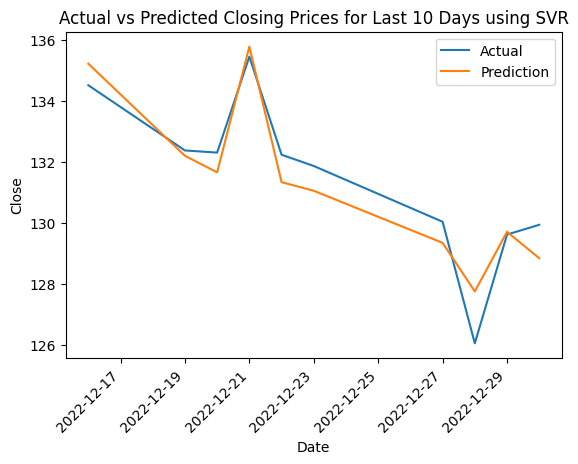

In [ ]:
# Define the function to calculate the difference between actual values and predictions
def calculate_difference(actual_values, predictions):
    difference = actual_values - predictions
    return difference

# Define the function to plot actual vs. predicted closing prices using SVR
def plot_predictions_svr(data, model, days, scaler):
    last_n_days_features = data[['Open', 'High', 'Low', 'Volume']].iloc[-days:]
    actual_values = data['Close'].iloc[-days:].values

    # Scale the input features for prediction
    last_n_days_features_scaled = scaler.transform(last_n_days_features)
    predictions = svr2.predict(last_n_days_features_scaled)

    comparison = pd.DataFrame({
        'Date': data.index[-days:],
        'Actual': actual_values,
        'Prediction': predictions
    })

    difference = calculate_difference(actual_values, predictions)
    comparison['Difference'] = difference

    print(f'\nComparison for the last {days} days using SVR:')
    print(comparison)

    comparison.set_index('Date', inplace=True)

    # Plot actual vs. predicted closing prices
    comparison[['Actual', 'Prediction']].plot(kind='line')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.title(f'Actual vs Predicted Closing Prices for Last {days} Days using SVR')
    plt.xticks(rotation=45)
    plt.show()

# Plot actual vs. predicted closing prices using SVR
plot_predictions_svr(data, svr2, 10, scaler)

## SVR Combine 1 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical stock data for Apple (AAPL) for the past 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)

# Drop rows with missing values (introduced by lags and moving averages)
data.dropna(inplace=True)

# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)

# Perform hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train using the best parameters
svr_tuned = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)

[*********************100%***********************]  1 of 1 completed


SVR(C=100, gamma=0.001)

In [ ]:
# Make predictions with the tuned model
y_train_pred_tuned = svr_tuned.predict(X_train)
y_val_pred_tuned = svr_tuned.predict(X_val)
y_test_pred_tuned = svr_tuned.predict(X_test)

# Evaluate the model with tuned hyperparameters
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("R² Score:", r2)

evaluate_model(y_train, y_train_pred_tuned, "Tuned Training")
evaluate_model(y_val, y_val_pred_tuned, "Tuned Validation")
evaluate_model(y_test, y_test_pred_tuned, "Tuned Testing")


Tuned Training Set Evaluation:
Mean Absolute Error (MAE): 1.04
Mean Squared Error (MSE): 2.96
Root Mean Squared Error (RMSE): 1.72
R² Score: 0.9963136746935417

Tuned Validation Set Evaluation:
Mean Absolute Error (MAE): 1.99
Mean Squared Error (MSE): 6.80
Root Mean Squared Error (RMSE): 2.61
R² Score: 0.9750634660887799

Tuned Testing Set Evaluation:
Mean Absolute Error (MAE): 3.42
Mean Squared Error (MSE): 19.41
Root Mean Squared Error (RMSE): 4.41
R² Score: 0.8787644976239964


## SVR Combine 2 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


start_time = time.time()
# Download historical stock data for Apple (AAPL) for the past 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")


start_time = time.time()
# Feature Engineering: Moving Averages, RSI, Lags, and Volatility Measures
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices (5 lags)
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()  # 30-day rolling standard deviation

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.09 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


start_time = time.time()

# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

start_time = time.time()
# Train a new model using best parameters
svr_tuned = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)
print(f"Time taken to train SVR model: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.00 seconds
Best parameters found: {'C': 1000, 'gamma': 1, 'kernel': 'linear'}
Time taken for hyperparameter tuning: 130.67 seconds
Time taken to train SVR model: 5.00 seconds


In [ ]:
# Make predictions
y_val_pred = svr_tuned.predict(X_val)
y_test_pred = svr_tuned.predict(X_test)

# Evaluate the model on validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")


Validation Mean Absolute Error (MAE): 2.44
Validation Mean Squared Error (MSE): 9.70
Validation Root Mean Squared Error (RMSE): 3.11
Validation R-squared (R2): 0.92

Test Mean Absolute Error (MAE): 2.64
Test Mean Squared Error (MSE): 11.45
Test Root Mean Squared Error (RMSE): 3.38
Test R-squared (R2): 0.90


## SVR Combine 3 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Start timer for data download
start_time = time.time()

# Download historical stock data for Apple (AAPL) for the past 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, Lags, MACD, Bollinger Bands, and Volatility Measures
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices (5 lags)
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()  # 30-day rolling standard deviation

# Function to compute the Moving Average Convergence Divergence (MACD)
def compute_macd(data, short_window=12, long_window=26):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    return exp1 - exp2

# Calculate MACD
data['MACD'] = compute_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Low'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

# Drop rows with missing values (introduced by lags and moving averages)
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.08 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Scale the features
scaler = MinMaxScaler()  # Using MinMax scaler instead of StandardScaler
X_scaled = scaler.fit_transform(X)

# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.00 seconds


In [ ]:
# Start timer for hyperparameter tuning
start_time = time.time()

# Perform hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.001, 'scale'],
    'kernel': ['rbf', 'linear']
}

random_search = RandomizedSearchCV(SVR(), param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")
print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Start timer for training the tuned SVR model
start_time = time.time()

# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)
print(f"Time taken to train SVR model: {time.time() - start_time:.2f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'kernel': 'linear', 'gamma': 0.01, 'C': 100}
Time taken for hyperparameter tuning: 18.72 seconds
Time taken to train SVR model: 1.48 seconds


In [ ]:
# Make predictions and evaluate the model
y_val_pred = svr_tuned.predict(X_val)
y_test_pred = svr_tuned.predict(X_test)

# Evaluate the model on validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")


Validation Mean Absolute Error (MAE): 2.13
Validation Mean Squared Error (MSE): 6.89
Validation Root Mean Squared Error (RMSE): 2.63
Validation R-squared (R2): 0.94

Test Mean Absolute Error (MAE): 2.13
Test Mean Squared Error (MSE): 7.32
Test Root Mean Squared Error (RMSE): 2.71
Test R-squared (R2): 0.93


# Linear Section

## Linear 10 years - MAE -

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Download historical stock data for Apple (AAPL) for the past 10 years
data = yf.download('AAPL', start='2012-01-01', end='2023-01-01')

# Prepare data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred = linreg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

[*********************100%***********************]  1 of 1 completed

Mean Absolute Error (MAE): 0.3245518923545114
Mean Squared Error (MSE): 0.3493523795520995
Root Mean Squared Error (RMSE): 0.5910603857069932
R² Score: 0.9998483075776519


##Linear Default -MAE


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Download historical stock data for Apple (AAPL) for the past 5 years
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Prepare data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred = linreg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

[*********************100%***********************]  1 of 1 completed

Mean Absolute Error (MAE): 0.5299103498271712
Mean Squared Error (MSE): 0.6669721612841574
Root Mean Squared Error (RMSE): 0.8166836359840678
R² Score: 0.9996832712061307


## Linear Feature Engineering -MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time as time

# Start timer for data download
start_time = time.time()
# Download historical stock data for Apple (AAPL) for the past 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.27 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Start timer for splitting data
start_time = time.time()
# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

# Start timer for model training
start_time = time.time()
# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f"Time taken to train Linear Regression model: {time.time() - start_time:.2f} seconds")

# Make predictions
y_train_pred = linreg.predict(X_train)
y_val_pred = linreg.predict(X_val)
y_test_pred = linreg.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("R² Score:", r2)

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_val, y_val_pred, "Validation")
evaluate_model(y_test, y_test_pred, "Testing")

Time taken for data splitting: 0.01 seconds
Time taken to train Linear Regression model: 0.05 seconds

Training Set Evaluation:
Mean Absolute Error (MAE): 0.85
Mean Squared Error (MSE): 1.85
Root Mean Squared Error (RMSE): 1.36
R² Score: 0.9976932063962832

Validation Set Evaluation:
Mean Absolute Error (MAE): 1.71
Mean Squared Error (MSE): 4.82
Root Mean Squared Error (RMSE): 2.20
R² Score: 0.9823279951151855

Testing Set Evaluation:
Mean Absolute Error (MAE): 2.91
Mean Squared Error (MSE): 13.83
Root Mean Squared Error (RMSE): 3.72
R² Score: 0.9136585186586375


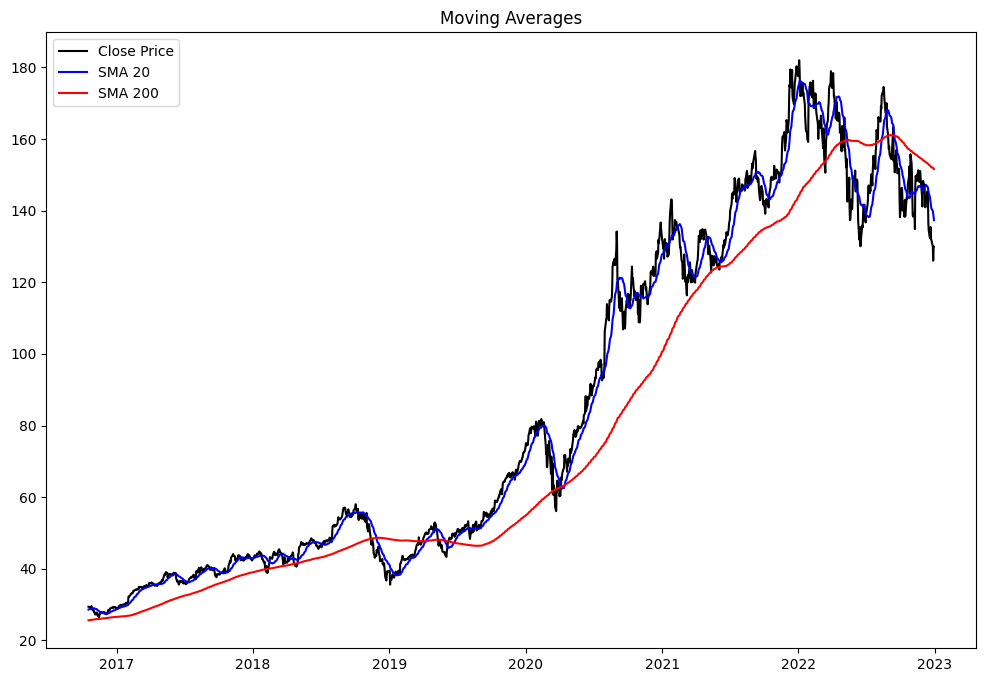

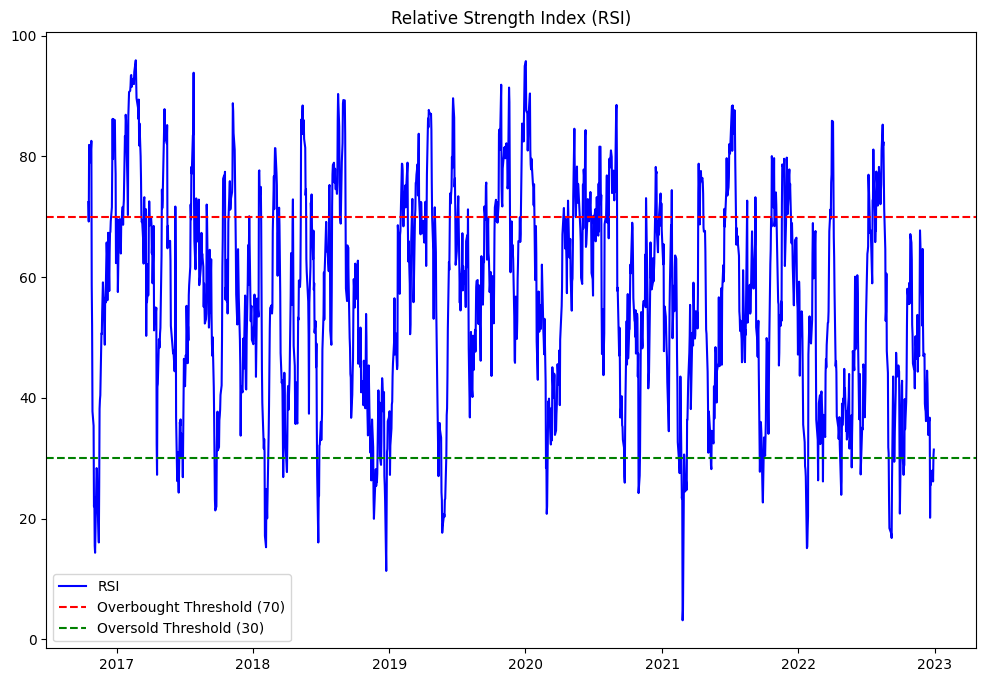

In [ ]:
import matplotlib.pyplot as plt

# Moving Averages
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='black')
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='blue')
plt.plot(data.index, data['SMA_200'], label='SMA 200', color='red')
plt.title('Moving Averages')
plt.legend()
plt.show()

# Relative Strength Index (RSI)
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold Threshold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

## Linear Hypertuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Start timer for data download
start_time = time.time()

# Download historical stock data for Apple (AAPL) for the past 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.08 seconds


In [ ]:
# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Linear Regression model
linreg = LinearRegression()

# Turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Time taken for data splitting: 0.01 seconds
Time taken for hyperparameter tuning: 1.03 seconds
Testing (Best Model) - MAE: 0.95, MSE: 1.42, RMSE: 1.19, R2: 0.99


## Linear combine 1- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import time
from sklearn.pipeline import Pipeline

# Start timer for data download
start_time = time.time()

# Download historical stock data for Apple (AAPL) for the past 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values (introduced by lags and moving averages)
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.18 seconds
Time taken for feature engineering: 0.04 seconds


In [ ]:
# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)  # Fit on combined train and validation data

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.01 seconds
Time taken for hyperparameter tuning: 14.82 seconds


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Testing (Best Model) - MAE: 2.62, MSE: 11.13, RMSE: 3.34, R2: 0.93


## Linear Comine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import time
from sklearn.pipeline import Pipeline

# Start timer for data download
start_time = time.time()

# Download historical stock data for Apple (AAPL) for the past 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.09 seconds
Time taken for feature engineering: 0.01 seconds


In [ ]:
# Start timer for splitting data
start_time = time.time()

# Split the data into training (80%) and temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)

# Split the temporary data into validation (10%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.01 seconds
Time taken for hyperparameter tuning: 13.87 seconds


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Testing (Best Model) - MAE: 2.56, MSE: 10.76, RMSE: 3.28, R2: 0.90


## Linear Combine 3 - MAE



In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import time
from sklearn.pipeline import Pipeline

# Start timer for data download
start_time = time.time()

# Download historical stock data for Apple (AAPL) for the past 7 years
data = yf.download('AAPL', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # Adding SMA_50
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Volatility (30-day rolling standard deviation)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# MACD calculation
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']

# Bollinger Bands (20-day moving average and 2 standard deviations)
data['Bollinger_MA'] = data['Close'].rolling(window=20).mean()
data['Bollinger_STD'] = data['Close'].rolling(window=20).std()
data['Bollinger_High'] = data['Bollinger_MA'] + (data['Bollinger_STD'] * 2)
data['Bollinger_Low'] = data['Bollinger_MA'] - (data['Bollinger_STD'] * 2)

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values (introduced by lags and moving averages)
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.10 seconds
Time taken for feature engineering: 0.03 seconds


In [ ]:
# Start timer for splitting data
start_time = time.time()

# Split the data into 80 10 10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Linear Regression model
linreg = LinearRegression()

# Turn  features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

Time taken for data splitting: 0.01 seconds
Time taken for hyperparameter tuning: 44.03 seconds


In [ ]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Testing (Best Model) - MAE: 1.79, MSE: 5.50, RMSE: 2.35, R2: 0.95


# Polynomial Section

## Polynomial default 10 years - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks from Yahoo Finance (10 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to include polynomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialise and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 4.277461123200734
Mean Squared Error (MSE): 29.803723798395467
Root Mean Squared Error (RMSE): 5.4592786884711675
R-squared (R2): 0.9870589143724501


## Polynomial Default 5 years - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Download historical data for Apple stocks from Yahoo Finance (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to include polynomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialise and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.5299103500666903
Mean Squared Error (MSE): 0.6669721614508002
Root Mean Squared Error (RMSE): 0.8166836360860918
R-squared (R2): 0.9996832712060515


## Polynominal Feature Engineering- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for Apple stocks from Yahoo Finance (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI', 'Lag1', 'Lag2']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Transform features to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialise and fit the polynomial ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, ridge_model.predict(X_train_poly))
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, ridge_model.predict(X_val_poly))
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_pred_ridge)

# Display results
print("\nTraining Set:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R2:", r2_train)

print("\nValidation Set:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("R2:", r2_val)

print("\nTesting Set (Ridge Regression):")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R2:", r2_test)


Training Set:
MAE: 0.5054985262029883
MSE: 0.45349757414241726
RMSE: 0.6734222851542836
R2: 0.9995856449853081

Validation Set:
MAE: 0.8155114864847935
MSE: 1.2120170742440735
RMSE: 1.1009164701484275
R2: 0.9917215070523452

Testing Set (Ridge Regression):
MAE: 0.9649245480250872
MSE: 1.5025853886660723
RMSE: 1.2257998974816697
R2: 0.9878749505121154


## Polynominal Hypertuning - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Volume', 'Low']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Updated parameter distributions for searching
param_distributions = {
    'polynomialfeatures__degree': [2, 3],
    'ridge__alpha': uniform(loc=0, scale=10)
}

# Pipeline for polynomial transformation and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Perform RandomizedSearchCV with a set number of iterations
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Best Parameters:", random_search.best_params_)
print("\nEvaluation Metrics for Testing Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Best Parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 1.5599452033620265}

Evaluation Metrics for Testing Set:
MAE: 1.55
MSE: 3.81
RMSE: 1.95
R2: 0.98


## Polynominal combine 1  - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline for polynomial transformation and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [2, 3],
    'ridge__alpha': [0.01, 0.1, 1, 10]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Parameters:", grid_search.best_params_)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

Best Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.01}

Training Set:
MAE: 0.25
MSE: 0.15
RMSE: 0.38
R2: 1.00

Validation Set:
MAE: 1.77
MSE: 3.98
RMSE: 2.00
R2: 0.99

Testing Set:
MAE: 5.21
MSE: 33.08
RMSE: 5.75
R2: 0.79


## Polynominal combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
# Pipeline for polynomial transformation, scaling, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Parameter grid for GridSearchCV
param_grid = {
    'poly_features__degree': [2, 3, 4],
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# Use K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Perform GridSearchCV to find the best hyperparameters with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Make predictions
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("\nTraining Set Metrics:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")

print("\nValidation Set Metrics:")
print(f"MAE: {mae_val:.2f}, MSE: {mse_val:.2f}, RMSE: {rmse_val:.2f}, R2: {r2_val:.2f}")

print("\nTesting Set Metrics:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")

[*********************100%***********************]  1 of 1 completed


Best Parameters: {'poly_features__degree': 2, 'ridge__alpha': 0.01}

Training Set Metrics:
MAE: 0.19, MSE: 0.07, RMSE: 0.26, R2: 1.00

Validation Set Metrics:
MAE: 1.47, MSE: 3.97, RMSE: 1.99, R2: 0.98

Testing Set Metrics:
MAE: 3.80, MSE: 24.43, RMSE: 4.94, R2: 0.86


## Polynominal combine 3 -MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['RSI'] = calculate_rsi(data)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()
data['MACD'] = (data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean())
data['Bollinger_High'] = data['SMA_50'] + (data['Close'].rolling(window=50).std() * 2)
data['Bollinger_Low'] = data['SMA_50'] - (data['Close'].rolling(window=50).std() * 2)

# Generate lagged features and drop NaNs
for i in range(1, 6):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD', 'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Split the data 60 20 20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
# Create pipelines
ridge_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge(max_iter=20000, tol=1e-3))
lasso_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(), Lasso(max_iter=20000, tol=1e-3))

# Update parameter grids
param_grid_ridge = {
    'polynomialfeatures__degree': [2],
    'ridge__alpha': np.logspace(-4, 2, 7)
}

param_grid_lasso = {
    'polynomialfeatures__degree': [2],
    'lasso__alpha': np.logspace(-4, 0, 5)
}

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search for both models
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=tscv, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train, y_train)

grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid_lasso, cv=tscv, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train, y_train)

# Best models
best_ridge = grid_search_ridge.best_estimator_
best_lasso = grid_search_lasso.best_estimator_

In [ ]:
# Predictions for Ridge
y_train_pred_ridge = best_ridge.predict(X_train)
y_val_pred_ridge = best_ridge.predict(X_val)
y_test_pred_ridge = best_ridge.predict(X_test)

# Predictions for Lasso
y_train_pred_lasso = best_lasso.predict(X_train)
y_val_pred_lasso = best_lasso.predict(X_val)
y_test_pred_lasso = best_lasso.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Evaluate Ridge set
mae_train_ridge, mse_train_ridge, rmse_train_ridge, r2_train_ridge = evaluate_model(y_train, y_train_pred_ridge)
mae_val_ridge, mse_val_ridge, rmse_val_ridge, r2_val_ridge = evaluate_model(y_val, y_val_pred_ridge)
mae_test_ridge, mse_test_ridge, rmse_test_ridge, r2_test_ridge = evaluate_model(y_test, y_test_pred_ridge)

# Evaluate Lasso set
mae_train_lasso, mse_train_lasso, rmse_train_lasso, r2_train_lasso = evaluate_model(y_train, y_train_pred_lasso)
mae_val_lasso, mse_val_lasso, rmse_val_lasso, r2_val_lasso = evaluate_model(y_val, y_val_pred_lasso)
mae_test_lasso, mse_test_lasso, rmse_test_lasso, r2_test_lasso = evaluate_model(y_test, y_test_pred_lasso)

In [ ]:
# Pick the best scores for the final model
# Display results for Ridge
print("Ridge Regression Best Parameters:", grid_search_ridge.best_params_)
print("\n--- Ridge Results ---")
print("\nTraining Set:", f"MAE: {mae_train_ridge:.2f}, MSE: {mse_train_ridge:.2f}, RMSE: {rmse_train_ridge:.2f}, R2: {r2_train_ridge:.2f}")
print("\nValidation Set:", f"MAE: {mae_val_ridge:.2f}, MSE: {mse_val_ridge:.2f}, RMSE: {rmse_val_ridge:.2f}, R2: {r2_val_ridge:.2f}")
print("\nTesting Set:", f"MAE: {mae_test_ridge:.2f}, MSE: {mse_test_ridge:.2f}, RMSE: {rmse_test_ridge:.2f}, R2: {r2_test_ridge:.2f}")

# Display results for Lasso
print("\nLasso Regression Best Parameters:", grid_search_lasso.best_params_)
print("\n--- Lasso Results ---")
print("\nTraining Set:", f"MAE: {mae_train_lasso:.2f}, MSE: {mse_train_lasso:.2f}, RMSE: {rmse_train_lasso:.2f}, R2: {r2_train_lasso:.2f}")
print("\nValidation Set:", f"MAE: {mae_val_lasso:.2f}, MSE: {mse_val_lasso:.2f}, RMSE: {rmse_val_lasso:.2f}, R2: {r2_val_lasso:.2f}")
print("\nTesting Set:", f"MAE: {mae_test_lasso:.2f}, MSE: {mse_test_lasso:.2f}, RMSE: {rmse_test_lasso:.2f}, R2: {r2_test_lasso:.2f}")

[*********************100%***********************]  1 of 1 completed


Ridge Regression Best Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0}

--- Ridge Results ---

Training Set: MAE: 0.58, MSE: 0.61, RMSE: 0.78, R2: 1.00

Validation Set: MAE: 6.25, MSE: 56.67, RMSE: 7.53, R2: 0.70

Testing Set: MAE: 11.04, MSE: 156.50, RMSE: 12.51, R2: 0.08

Lasso Regression Best Parameters: {'lasso__alpha': 0.1, 'polynomialfeatures__degree': 2}

--- Lasso Results ---

Training Set: MAE: 0.57, MSE: 0.80, RMSE: 0.89, R2: 1.00

Validation Set: MAE: 1.90, MSE: 6.49, RMSE: 2.55, R2: 0.97

Testing Set: MAE: 3.06, MSE: 14.70, RMSE: 3.83, R2: 0.91


# Elastic Section

## Elastic Default 10 years -  MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks from Yahoo Finance (10 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

[*********************100%%**********************]  1 of 1 completed


Mean Absolute Error (MAE): 6.258063589140058
Mean Squared Error (MSE): 55.54831498901648
Root Mean Squared Error (RMSE): 7.453074197203224
R-squared (R2): 0.9758803461741354


## Elastic default 5 years- MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks from Yahoo Finance (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

[*********************100%***********************]  1 of 1 completed


Mean Absolute Error (MAE): 6.504512546058992
Mean Squared Error (MSE): 51.03039360850666
Root Mean Squared Error (RMSE): 7.143556089827157
R-squared (R2): 0.9757669120894283


## Elastic Feature Engineering - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")


Training Set:
MAE: 1.70
MSE: 5.67
RMSE: 2.38
R2: 0.99

Validation Set:
MAE: 3.02
MSE: 14.45
RMSE: 3.80
R2: 0.95

Testing Set:
MAE: 3.22
MSE: 16.15
RMSE: 4.02
R2: 0.90


## Elastic Hypertuning- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Volume', 'Low']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

model = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}

Training Set:
MAE: 0.33
MSE: 0.31
RMSE: 0.56
R2: 1.00

Validation Set:
MAE: 0.89
MSE: 1.24
RMSE: 1.12
R2: 0.99

Testing Set:
MAE: 1.42
MSE: 3.08
RMSE: 1.75
R2: 0.98

Overall Performance:
Overall MAE: 0.88
Overall MSE: 1.55
Overall RMSE: 1.14
Overall R2: 0.99


## Elastic combine 1- MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio
param_grid = {
    'alpha': np.logspace(-3, 2, 6),
    'l1_ratio': np.linspace(0, 1, 6)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.8}
Time taken for GridSearchCV: 6.17 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.517e+02, tolerance: 8.782e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 0.43
MSE: 0.50
RMSE: 0.71
R2: 1.00

Tuned Validation Set:
MAE: 1.10
MSE: 2.06
RMSE: 1.44
R2: 0.99

Tuned Testing Set:
MAE: 1.60
MSE: 4.10
RMSE: 2.02
R2: 0.97


##Elastic Combine 2 - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training, validation, and testing sets (80/10/10 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio with a broader range
param_grid = {
    'alpha': np.logspace(-4, 2, 7),
    'l1_ratio': np.linspace(0, 1, 11)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.6000000000000001}
Time taken for GridSearchCV: 4.24 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.096e+02, tolerance: 1.697e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 0.51
MSE: 0.63
RMSE: 0.79
R2: 1.00

Tuned Validation Set:
MAE: 1.59
MSE: 4.13
RMSE: 2.03
R2: 0.97

Tuned Testing Set:
MAE: 1.52
MSE: 3.68
RMSE: 1.92
R2: 0.97


In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# split the data into training vaildation and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialise the ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio with a broader range
param_grid = {
    'alpha': np.logspace(-4, 2, 7),
    'l1_ratio': np.linspace(0, 1, 11)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")

[*********************100%***********************]  1 of 1 completed


Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Time taken for GridSearchCV: 3.37 seconds

Tuned Training Set:
MAE: 0.29
MSE: 0.20
RMSE: 0.45
R2: 1.00

Tuned Validation Set:
MAE: 0.93
MSE: 1.56
RMSE: 1.25
R2: 0.99

Tuned Testing Set:
MAE: 1.39
MSE: 3.26
RMSE: 1.81
R2: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+02, tolerance: 1.926e+01
  model = cd_fast.enet_coordinate_descent(


## Elastic Combine 3 - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Apple stocks from Yahoo Finance (7 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculate Volatility
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Calculate MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']

# Calculate Bollinger Bands
data['Bollinger_High'] = data['SMA_50'] + (data['Close'].rolling(window=50).std() * 2)
data['Bollinger_Low'] = data['SMA_50'] - (data['Close'].rolling(window=50).std() * 2)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data with new features
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD', 'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Split the data into training, validation, and testing sets (80/10/10 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio with a broader range
param_grid = {
    'alpha': np.logspace(-4, 2, 7),
    'l1_ratio': np.linspace(0, 1, 11)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 1.0}
Time taken for GridSearchCV: 8.31 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.741e+02, tolerance: 1.697e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 0.84
MSE: 1.68
RMSE: 1.29
R2: 1.00

Tuned Validation Set:
MAE: 2.25
MSE: 8.00
RMSE: 2.83
R2: 0.93

Tuned Testing Set:
MAE: 2.20
MSE: 8.67
RMSE: 2.94
R2: 0.92


**(Effective for datasets with a mix of important and irrelevant features but may underperform in capturing complex patterns.)**

# KNN Section

## KNN Default 10 years - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks from Yahoo Finance (10 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']


In [ ]:
# Split the data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


[*********************100%%**********************]  1 of 1 completed

Mean Absolute Error (MAE): 0.8477119188460093
Mean Squared Error (MSE): 1.9467814821936682
Root Mean Squared Error (RMSE): 1.3952711142260734
R-squared (R2): 0.9991546873125783


## KNN default 5 years - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks from Yahoo Finance (10 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


[*********************100%%**********************]  1 of 1 completed

Mean Absolute Error (MAE): 1.4339400488232814
Mean Squared Error (MSE): 5.5606479908312485
Root Mean Squared Error (RMSE): 2.358102625169492
R-squared (R2): 0.9973593840440397


## KNN Feature Engineering - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for Apple stocks from Yahoo Finance (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")


Training Set:
MAE: 1.18
MSE: 2.74
RMSE: 1.65
R2: 1.00

Validation Set:
MAE: 13.40
MSE: 242.49
RMSE: 15.57
R2: -0.90

Testing Set:
MAE: 5.93
MSE: 58.05
RMSE: 7.62
R2: 0.48

Overall Performance:
Overall MAE: 6.84
Overall MSE: 101.09
Overall RMSE: 8.28
Overall R2: 0.19


## KNN Hypertuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Extracting features
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTest Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


[*********************100%%**********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Test Set:
MAE: 1.11
MSE: 2.91
RMSE: 1.71
R2: 1.00


## KNN combine 1  - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

[*********************100%%**********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Training Set:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00

Validation Set:
MAE: 12.76
MSE: 230.40
RMSE: 15.18
R2: -0.81

Testing Set:
MAE: 5.04
MSE: 46.85
RMSE: 6.85
R2: 0.58


## KNN Combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Apple stocks (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

In [ ]:
# Split the data into 80% (train + validation) and 20% (test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now split the training/validation data into 80% (train) and 10% (validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Start timing
start_time = time.time()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Get best parameters and model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

# Print execution time
print(f"\nModel execution time: {execution_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Training Set:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00

Validation Set:
MAE: 13.30
MSE: 259.91
RMSE: 16.12
R2: -1.17

Testing Set:
MAE: 6.82
MSE: 84.71
RMSE: 9.20
R2: 0.42

Model execution time: 1.92 seconds


## KNN Combine 3 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Apple stocks (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculate Volatility
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Calculate MACD
def calculate_macd(data):
    exp12 = data['Close'].ewm(span=12, adjust=False).mean()
    exp26 = data['Close'].ewm(span=26, adjust=False).mean()
    macd = exp12 - exp26
    return macd

data['MACD'] = calculate_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['SMA_20'] + 2 * data['Close'].rolling(window=20).std()
data['Bollinger_Low'] = data['SMA_20'] - 2 * data['Close'].rolling(window=20).std()

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Prepare the data with new features
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

In [ ]:
# Split the data into 80% 10% 10%
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Start timing
start_time = time.time()

# Hyperparameter tuning GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Get best parameters and model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

# Print time taken
print(f"\nModel execution time: {execution_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Training Set:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00

Validation Set:
MAE: 16.80
MSE: 402.27
RMSE: 20.06
R2: -2.36

Testing Set:
MAE: 10.13
MSE: 169.76
RMSE: 13.03
R2: -0.16

Model execution time: 0.84 seconds
